In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv("data/suicide_rates.csv")
file2 = pd.read_csv("data/population/pop_totals.csv")

# preview file data using .head()
file.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [2]:
file2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [3]:
countries = file['country'].unique()
#countries[100]


In [4]:
len(countries)

101

In [5]:
np.sort(file['year'].unique())

x_years = np.linspace(2006,2015,10)
x_years

array([2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
       2015.])

In [6]:
file['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [7]:
file['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [8]:
max_suicide = file.groupby('suicides/100k pop').aggregate(np.max)
max_suicide

,country,year,sex,age,suicides_no,population,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
suicides/100k pop,,,,,,,,,,,
0.00,Uruguay,2016,male,75+ years,0,8673303,Uruguay2014,0.942,"997,007,926",126352,Silent
0.02,Thailand,2011,male,5-14 years,1,5821000,Thailand1994,0.651,"416,878,162,441",8906,Millenials
0.03,United Kingdom,2010,male,5-14 years,1,3778962,United Kingdom2010,0.906,"926,884,816,754",42486,Millenials
0.04,Spain,2015,male,5-14 years,2,5126281,Spain2015,0.874,"612,939,685,081",36869,Millenials
0.05,United Kingdom,2011,male,5-14 years,2,3949849,United Kingdom2003,0.870,"906,853,273,138",36289,Millenials
...,...,...,...,...,...,...,...,...,...,...,...
182.32,Republic of Korea,2010,male,75+ years,1152,631853,Republic of Korea2010,NaN,"1,094,499,338,703",22994,Silent
185.37,Republic of Korea,2011,male,75+ years,1276,688365,Republic of Korea2011,NaN,"1,202,463,682,634",25157,Silent
187.06,Suriname,2012,male,75+ years,10,5346,Suriname2012,0.711,"4,980,000,000",10227,Silent


In [9]:
suicide_rates = file.drop(labels = 'gdp_per_capita ($)', axis = 1)
suicide_rates = suicide_rates.drop(labels = 'country-year', axis = 1)
suicide_rates = suicide_rates.drop(labels = 'HDI for year', axis = 1)
suicide_rates = suicide_rates.drop(labels = 'age', axis =1)
suicide_rates = suicide_rates.drop(labels = 'sex', axis =1)
suicide_rates = suicide_rates.drop(labels = 'population', axis =1)

In [10]:
suicide_rates

,country,year,suicides_no,suicides/100k pop,gdp_for_year ($),generation
0,Albania,1987,21,6.71,"2,156,624,900",Generation X
1,Albania,1987,16,5.19,"2,156,624,900",Silent
2,Albania,1987,14,4.83,"2,156,624,900",Generation X
3,Albania,1987,1,4.59,"2,156,624,900",G.I. Generation
4,Albania,1987,9,3.28,"2,156,624,900",Boomers
...,...,...,...,...,...,...
27815,Uzbekistan,2014,107,2.96,"63,067,077,179",Generation X
27816,Uzbekistan,2014,9,2.58,"63,067,077,179",Silent
27817,Uzbekistan,2014,60,2.17,"63,067,077,179",Generation Z
27818,Uzbekistan,2014,44,1.67,"63,067,077,179",Generation Z


In [11]:
# for index, row in suicide_rates.iterrows(): 
#     print("Total income in "+ row["Date"]+ " is:"+str(row["Income_1"]+row["Income_2"]))

In [89]:
suicide_rates.groupby("year").aggregate(np.mean)

,suicides_no,suicides/100k pop
year,,
1985,201.498264,11.826198
1986,209.496528,11.423333
1987,195.743827,11.644213
1988,205.826531,12.709405
1989,256.801282,12.879071
1990,251.772135,12.862956
1991,257.838542,13.438880
1992,271.119231,13.498564
1993,284.057692,13.833705


In [81]:
#suicide_10= suicide_rates[suicide_rates['year'] >= 2006] and suicide_rates[suicide_rates['year'] <=2016]
suicide_10=suicide_rates[(suicide_rates['year'] >= 2006) & (suicide_rates['year'] <= 2015)]
suicide_10

,country,year,suicides_no,suicides/100k pop,gdp_for_year ($),generation
204,Albania,2006,0,0.00,"8,992,642,349",Millenials
205,Albania,2006,0,0.00,"8,992,642,349",Generation X
206,Albania,2006,0,0.00,"8,992,642,349",Boomers
207,Albania,2006,0,0.00,"8,992,642,349",Millenials
208,Albania,2006,0,0.00,"8,992,642,349",Silent
...,...,...,...,...,...,...
27815,Uzbekistan,2014,107,2.96,"63,067,077,179",Generation X
27816,Uzbekistan,2014,9,2.58,"63,067,077,179",Silent
27817,Uzbekistan,2014,60,2.17,"63,067,077,179",Generation Z
27818,Uzbekistan,2014,44,1.67,"63,067,077,179",Generation Z


I want to combine the rows that have the same country and year, 
not worrying about the generation for now, to add up the total suicide count for each country for
each year. Then find the average suicide count for the decade. Then I'll take the 3 countries
with the least amount of suicides (not counting the ones that have zeroes for every
single generation). I'll look at the top country in tht list and break it back down into 
generation to find he happiest one. If time permits, I will also find the saddest generation.


In [82]:
z = suicide_10.groupby(["country", "year"]).aggregate(np.sum)
z

suicides_no  suicides/100k pop
country    year                                
Albania    2006            0               0.00
           2007          124              65.85
           2008          160              71.05
           2009            0               0.00
           2010           96              41.66
...                      ...                ...
Uzbekistan 2010         1464              63.23
           2011         1640              67.14
           2012         1835              77.53
           2013         1950              78.86
           2014         2095              85.12

[820 rows x 2 columns]

In [83]:
# z = suicide_10.groupby(["country"]).aggregate(np.sum)
# z

In [84]:
z.reset_index(0).reset_index(drop = False)
z.head(20)

suicides_no  suicides/100k pop
country             year                                
Albania             2006            0               0.00
                    2007          124              65.85
                    2008          160              71.05
                    2009            0               0.00
                    2010           96              41.66
Antigua and Barbuda 2006            0               0.00
                    2007            1               7.98
                    2008            0               0.00
                    2009            0               0.00
                    2012            0               0.00
                    2013            0               0.00
                    2014            0               0.00
                    2015            1              15.62
Argentina           2006         3108             128.22
                    2007         2946             118.35
                    2008         3059             118.11
                    2009         2884             107.32
                    2010         2943             111.24
                    2011         2912             105.87
                    2012         3248             119.82

In [85]:
#z.get_level_values("country")
#z.xs("country")#["country"]["year"]
#z.loc["Albania"]
z.loc[("Albania",2006)]


suicides_no          0.0
suicides/100k pop    0.0
Name: (Albania, 2006), dtype: float64

In [86]:
#how to count rows in a multi index
u = z.reset_index().groupby('country')['year'].nunique()
u

country
Albania                  5
Antigua and Barbuda      8
Argentina               10
Armenia                 10
Aruba                    6
                        ..
United Arab Emirates     5
United Kingdom          10
United States           10
Uruguay                  9
Uzbekistan               6
Name: year, Length: 95, dtype: int64

In [87]:
len(u)

95

In [88]:
len(u[u == 5])

2

In [17]:
#average suicide count from 2006-2015 per country
a = z.groupby("country").agg({"suicides_no":lambda x:x.sum() / 10, "suicides/100k pop":lambda x:x.sum() / 10})
a

,suicides_no,suicides/100k pop
country,,
Albania,38.0,17.856
Antigua and Barbuda,0.2,2.360
Argentina,3039.1,113.583
Armenia,68.3,38.127
Aruba,4.1,42.424
...,...,...
United Arab Emirates,52.6,7.884
United Kingdom,4407.1,80.256
United States,38738.5,160.148


In [18]:
#printing generational suicide data for the past 10 years

generational_suicide_10 = suicide_10.groupby("generation").sum("suicides/100k pop")
generational_suicide_10 = generational_suicide_10.drop(labels = 'year', axis =1)
generational_suicide_10 = generational_suicide_10.drop(labels = 'suicides/100k pop', axis =1)
generational_suicide_10

,suicides_no
generation,
Boomers,636436
Generation X,676467
Generation Z,15906
Millenials,443141
Silent,528922


In [19]:
global_suicide_10 = suicide_10.groupby("year").sum()
global_suicide_10

,suicides_no,suicides/100k pop
year,,
2006,233361,12166.01
2007,233408,12410.15
2008,235447,12145.84
2009,243487,12176.04
2010,238702,11843.99
2011,236484,11367.84
2012,230160,11101.91
2013,223199,10663.64
2014,222984,10306.73


In [20]:
y_sui_total = global_suicide_10["suicides/100k pop"]
y_sui_totals = np.array(y_sui_total)
y1 = list(y_sui_totals)


In [21]:
#file2['Year']
world = file2.loc[259][-15:-5]
world_pop = world.transpose()
y2 = list(world_pop)

In [22]:
percent_suicide = []
for i in y1:
    for j in y2:
        if y1.index(i) == y2.index(j):
            new_percent = i/j * 100
            percent_suicide.append(new_percent)
percent_suicide

[0.00018453662726935816,
 0.00018594203238924618,
 0.00017975140693753897,
 0.0001780233620574259,
 0.00017110951088140184,
 0.00016233090551738064,
 0.0001566784975810485,
 0.00014873253957811043,
 0.0001420776665066886,
 0.00011246632770215503]

In [23]:
avg_glb_percent = np.mean(percent_suicide)
avg_glb_percent

0.0001621648876420354

In [24]:
data = []
for i in y1:
    for j in y2:
        for k in percent_suicide:
            if y1.index(i) == y2.index(j) == percent_suicide.index(k):
                data.append([i,j,k])
data

[[12166.009999999993, 6592734559.0, 0.00018453662726935816],
 [12410.150000000005, 6674203697.0, 0.00018594203238924618],
 [12145.840000000002, 6757020825.0, 0.00017975140693753897],
 [12176.04, 6839574233.0, 0.0001780233620574259],
 [11843.990000000003, 6921877071.0, 0.00017110951088140184],
 [11367.840000000022, 7002880914.0, 0.00016233090551738064],
 [11101.909999999996, 7085790438.0, 0.0001566784975810485],
 [10663.639999999992, 7169675197.0, 0.00014873253957811043],
 [10306.730000000003, 7254292848.0, 0.0001420776665066886],
 [8253.989999999994, 7339076654.0, 0.00011246632770215503]]

In [25]:
glb_sui = pd.DataFrame(data, index = x_years, columns = ['No. of Suicides', 'Global Population', 'Percentage of the Population'])
glb_sui

,No. of Suicides,Global Population,Percentage of the Population
2006.0,12166.01,6.592735e+09,0.000185
2007.0,12410.15,6.674204e+09,0.000186
2008.0,12145.84,6.757021e+09,0.000180
2009.0,12176.04,6.839574e+09,0.000178
2010.0,11843.99,6.921877e+09,0.000171
2011.0,11367.84,7.002881e+09,0.000162
2012.0,11101.91,7.085790e+09,0.000157
2013.0,10663.64,7.169675e+09,0.000149
2014.0,10306.73,7.254293e+09,0.000142
2015.0,8253.99,7.339077e+09,0.000112


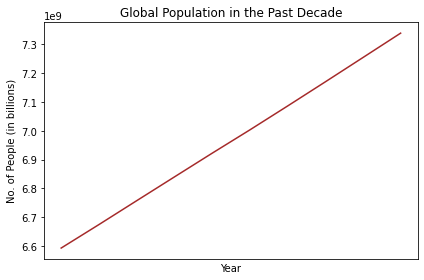

In [26]:
#Bar graph depicting the number of suicides per year from 2006-2015
ax, fig = plt.subplots(sharex=True,sharey=True)


plt.title("Global Population in the Past Decade")
plt.xlabel("Year")
plt.ylabel("No. of People (in billions)")
plt.xticks(range(2006,2016,1))
#plt.yticks(range(0,700000000,1000000))
#x-axis values
x_years = np.linspace(2006,2015,10)

#y-axis values
y1 = list(world_pop)
#y2 = list(world_pop)


plt.plot(y1, color = 'brown')
#plt.plot(y2, alpha = .7, color = 'brown')

plt.tight_layout()




#plt.subplot(1,2,1, facecolor='red')
# ax, fig = plt.subplots(1,1,sharex=True,sharey=True)


#plt.bar(years, A, color = 'b', label='A')
#plt.bar(years, increment, color = 'r', bottom = A, label='increment')

#plt.legend()



# ax, fig = plt.subplots(1,1,sharex=True,sharey=True)
# plt.bar(x_years, list(world_pop))
plt.savefig("images/Global_pop_last_decade")

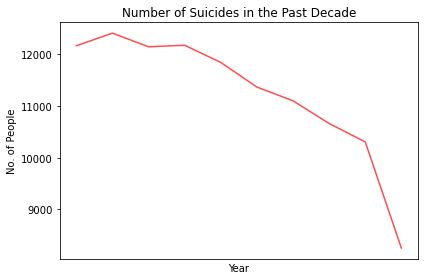

In [27]:
plt.title("Number of Suicides in the Past Decade")
plt.xlabel("Year")
plt.ylabel("No. of People")
plt.xticks(range(2006,2016,1))
#plt.yticks(range(0,700000000,1000000))
#x-axis values
x_years = np.linspace(2006,2015,10)

#y-axis values

y2 = list(y_sui_totals)


#plt.plot(y1, color = 'red')
plt.plot(y2, alpha = .7, color = 'red')

plt.tight_layout()
plt.savefig("images/Suicide_count_last_decade")

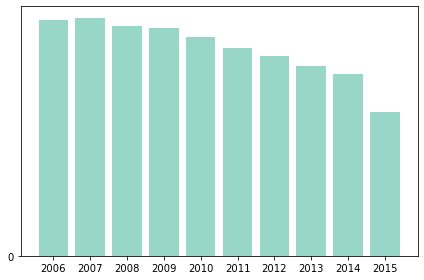

In [28]:
#percent of population has committed suicide
ax, fig = plt.subplots()

plt.bar(x_years, percent_suicide, color = '#7fcdbb', alpha = 0.8)
plt.xticks(range(2006,2016,1))
#plt.yticks(range(0,1,10))
plt.yticks(np.arange(0, max(percent_suicide),5))
#plt.set_size_inches(2,4)
plt.tight_layout()

In [29]:
global_avg = global_suicide_10['suicides_no'].mean()
global_avg

230087.2

In [30]:
#y1 = suicide totals for the decade, y2 = global population for the the decade
y1, y2

([6592734559.0,
  6674203697.0,
  6757020825.0,
  6839574233.0,
  6921877071.0,
  7002880914.0,
  7085790438.0,
  7169675197.0,
  7254292848.0,
  7339076654.0],
 [12166.009999999993,
  12410.150000000005,
  12145.840000000002,
  12176.04,
  11843.990000000003,
  11367.840000000022,
  11101.909999999996,
  10663.639999999992,
  10306.730000000003,
  8253.989999999994])

In [31]:
suicide_10.groupby("country").sum()

,year,suicides_no,suicides/100k pop
country,,,
Albania,120480,380,178.56
Antigua and Barbuda,193008,2,23.60
Argentina,241260,30391,1135.83
Armenia,241260,683,381.27
Aruba,144612,41,424.24
...,...,...,...
United Arab Emirates,120480,526,78.84
United Kingdom,241260,44071,802.56
United States,241260,387385,1601.48


In [32]:
by_year=suicide_10.groupby('year').aggregate(np.max)
by_year

,country,suicides_no,suicides/100k pop,gdp_for_year ($),generation
year,,,,,
2006,Uruguay,14020,204.92,"989,930,542,279",Silent
2007,Uruguay,13065,172.86,"9,206,301,700",Silent
2008,Uruguay,11848,154.92,"967,199,594",Silent
2009,Uzbekistan,11721,173.86,"97,798,351,648",Silent
2010,Uzbekistan,11767,182.32,"98,381,268,000",Silent
2011,Uzbekistan,11681,185.37,"9,774,316,692",Silent
2012,Uzbekistan,11763,187.06,"93,413,992,956",Silent
2013,Uzbekistan,11396,147.59,"98,478,349,315",Silent
2014,Uzbekistan,11455,124.45,"934,185,915,467",Silent


In [33]:
by_country=by_year.groupby('country').aggregate(np.max)
by_country.head()

,suicides_no,suicides/100k pop,gdp_for_year ($),generation
country,,,,
Uruguay,14020,204.92,"997,007,926",Silent
Uzbekistan,11767,187.06,"98,478,349,315",Silent


In [34]:
#by_country.groupby("year").sum()

In [35]:
df.loc[df['team'] == 'A', 'points'].sum()

NameError: name 'df' is not defined

In [ ]:
suicide_10.groupby("country").sum()